# Exploring the MovieLens dataset

Movies Dataset analysis

The dataset has been taken from Kaggle containing details for 45,000 movies listed in the Full MovieLens Dataset. This dataset also has files containing 26 million ratings from 270,000 users for all 45,000 movies.(https://www.kaggle.com/rounakbanik/the-movies-dataset)

My motivation for the project arises from my curiosity to better understand the following:

1. Number of movies produced over decades and increase in revenue
2. Most popular genres (in terms of revenue) in the decades between 1920 and 2010
3. Building a recommendation engine for users recommending movies based on genre, director and the lead

We will be using the CRISP-DM process to evaluate and analyse dataset. The CRISP-DM process covers the following steps:

1. Business Understanding
2. Data Understanding
3. Data Preparation
4. Evaluation
5. Deployment

CRISP DM Step 1. Business Understanding:

With the advent of online streaming platforms and a huge emphasis on the user, businesses are increasingly looking to engage more customers on their platforms. The year 2020 has further shifted the focus on consumption of movies and web series, especially with companies like Disney, HBO and others shifting to owning proprietry content.

My analysis of the movies dataset is aimed at analysing the behavioural preferences of audiences over the decades, on the preferred genres and in the last part, building a movie recommendation system ( which can be extrapolated to other datasets for web series) allowing users to explore their interests.

In [41]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import methods_py
import matplotlib.pylab as plt
import re

# Suppress warnings for seaborn and pandas SettingwithCopy warnings 
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.options.mode.chained_assignment = None 


In [42]:
# read the csv file into a dataframe
df_movies = pd.read_csv("/kaggle/input/the-movies-dataset/movies_metadata.csv")
# storing a raw dataframe for storing the file as is for any future analysis in the notebook
df_raw = df_movies
# display the first 3 rows
df_movies.head(3)

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0


## 2. Data Understanding

In [43]:
# explore the dataframe utilizing custom built utility script
methods_py.explore_df(df_movies)

The dataframe has  45466 rows and  24 columns 

There are  20 categorical columns and  4 numerical columns in the dataframe 

A list of all the categorical columns 

['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id', 'imdb_id', 'original_language', 'original_title', 'overview', 'popularity', 'poster_path', 'production_companies', 'production_countries', 'release_date', 'spoken_languages', 'status', 'tagline', 'title', 'video'] 

Unique values in column  adult : [' - Written by Ørnås', ' Avalanche Sharks tells the story of a bikini contest that turns into a horrifying affair when it is hit by a shark avalanche.', ' Rune Balot goes to a casino connected to the October corporation to try to wrap up her case once and for all.', 'False', 'True'] 

Total number of unique values for column  budget is  1226 

The first 10 unique values are ['/ff9qCepilowshEtG2GYWwzt2bs4.jpg', '/zV8bHuSL6WXoD6FWogP9j4x80bL.jpg', '/zaSf5OG7V8X8gqFvly88zDdRm46.jpg', '0', '1', '10', '100', '1

In [44]:
# utilizing custom method to explore nulls in the dataframe
methods_py.explore_null(df_movies)

The column(s) with all null values:  set() 

 More than  25 % of values are null for columns  {'tagline', 'homepage', 'belongs_to_collection'} 

 More than  50 % of values are null for columns  {'tagline', 'homepage', 'belongs_to_collection'} 

 More than  75 % of values are null for columns  {'homepage', 'belongs_to_collection'} 



Looks like there are more than 75% values as null in the columns 'belongs_to_collection' and 'homepage'. We can drop the columns if needed for working with predictions with the dataset.

In [45]:
df_movies.shape

(45466, 24)

In [46]:
# utilizing custom method to drop any row or column that has all null values
df_movies = methods_py.drop_all_nulls(df_movies)

In [47]:
df_movies.shape

(45466, 24)

As the number of rows and columns remain same as above, there were no rows or columns with "all" null values in the dataframe

In [48]:
# exploring genres, what genres and the count
df_movies['genres'].value_counts()

[{'id': 18, 'name': 'Drama'}]                                                                                                                                  5000
[{'id': 35, 'name': 'Comedy'}]                                                                                                                                 3621
[{'id': 99, 'name': 'Documentary'}]                                                                                                                            2723
[]                                                                                                                                                             2442
[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'name': 'Romance'}]                                                                                                1301
                                                                                                                                                               ... 
[{'id': 10770, '

## 3. Data Preparation

The genre column has a key,value pair as the value for each movie. I plan to clean up the values to extract the "name" tag and store the multiple genres for a movie into a list. This will allow us to have a more cleaner view to the details in genre

In [49]:
df_movies.head(2)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0


In [50]:
df_movies['genres'][:5].values

array(["[{'id': 16, 'name': 'Animation'}, {'id': 35, 'name': 'Comedy'}, {'id': 10751, 'name': 'Family'}]",
       "[{'id': 12, 'name': 'Adventure'}, {'id': 14, 'name': 'Fantasy'}, {'id': 10751, 'name': 'Family'}]",
       "[{'id': 10749, 'name': 'Romance'}, {'id': 35, 'name': 'Comedy'}]",
       "[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'name': 'Drama'}, {'id': 10749, 'name': 'Romance'}]",
       "[{'id': 35, 'name': 'Comedy'}]"], dtype=object)

In [51]:
def retrieve_tag_dataframe(df,col_name,tag_to_search,pos_from_tag,split_on,row_num, first_n_values=1):
    '''
    INPUT:
    df : dataframe to be searched
    col_name: the column to be searched
    tag_to_search: the tag to be searched for i.e. "\name\:"
    pos_from_tag: the number of positions from the tag, where the value that needs to be extracted starts i.e. 3
    split_on: once extracted, what to split on the string to pick the first piece i.e. can be "," or "}"
    row_num : the row number to be searched
    first_n_values: how many occurences of the tag do we need to pull i.e. 4
    
    OUTPUT:
    list with the cleaned up values as elements
    
    Description:
    on the string provided (x), finds the tag, picks up the value at the "pos_from_tag" location, splits and picks the first half
    
    '''
    name_pos_list= [m.start()+pos_from_tag for m in re.finditer(tag_to_search, df[col_name][row_num])]
    j=0
    val_list=list()
    
    # iterate through the positions and pick genres
    for i in name_pos_list:
        if j < first_n_values:
            val_list.append(df[col_name][row_num][i:].split(split_on)[0].replace("'","").replace(" ","").strip(""))
            j+=1
    return val_list



def retrieve_tag_field(x,tag_to_search,pos_from_tag,split_on, first_n_values=1):
    '''
    INPUT:
    x : the string to be searched for i.e. "\name\:'John Doe'"
    tag_to_search: the tag to be searched for i.e. "\name\:"
    pos_from_tag: the number of positions from the tag, where the value that needs to be extracted starts i.e. 3
    split_on: once extracted, what to split on the string to pick the first piece i.e. can be "," or "}"
    first_n_values: how many occurences of the tag do we need to pull i.e. 4
    
    OUTPUT:
    list with the cleaned up values as elements
    
    Description:
    on the string provided (x), finds the tag, picks up the value at the "pos_from_tag" location, splits and picks the first half
    
    '''
    # the finditer allows us to store a list of all the positions of the value we are looking for
    name_pos_list= [m.start()+pos_from_tag for m in re.finditer(tag_to_search, x)]
    j=0
    # to store the values, will be returned as the final output
    val_list=list()
    
    # iterate through the positions and pick genres
    for i in name_pos_list:
        # only loop through the first_n_values provided by user, 1 by default
        if j < first_n_values:
            val_list.append(x[i:].split(split_on)[0].replace("'","").replace(" ","").strip(""))
            j+=1
    return val_list


In [52]:
# Create the director column using custom method "retrieve_tag_field"
print(retrieve_tag_dataframe(df_movies,"genres","'name'",7,"}",7888,1))

['Adventure']


### Cleaning up Genre field

In [53]:
# Clean up genre column using custom method "retrieve_tag_field"
df_movies['genres'] = df_movies['genres'].apply( lambda x : retrieve_tag_field(x,"name",7,"}",len(x)))
df_movies['genres'][:5]

0     [Animation, Comedy, Family]
1    [Adventure, Fantasy, Family]
2               [Romance, Comedy]
3        [Comedy, Drama, Romance]
4                        [Comedy]
Name: genres, dtype: object

## 1. Most common genres in our dataset

In [54]:
# lets collect all the unique values of genre into a set
# this will provide us with the collection of all genres at one place

genre_set = set()
# iterate through each element in the genre list for all rows
for ele in df_movies['genres'].tolist():
    # as each element is also a list, we go through each value in the list
    for item in ele:
        # we want to avoid any garbage value that comes in, for e.g. if it contains the "id" tag
        if item.find("id:") < 0:
            genre_set.add(item)
    
print(genre_set)

{'Animation', 'Documentary', 'Adventure', 'TVMovie', 'Thriller', 'Comedy', 'Fantasy', 'Romance', 'Foreign', 'War', 'Drama', 'Music', 'Mystery', 'Western', 'Crime', 'ScienceFiction', 'Action', 'Horror', 'Family', 'History'}


In [55]:
# now that we have the cleaned up genre field in form of a list
# the contains method will help us find all occurences of a genre

genre_count = dict()
for genre in list(genre_set):
    genre_count[genre]= sum(df_movies.genres.str.contains(genre, regex=False))
    print("Count of "+genre+" movies : ",genre_count[genre] )

Count of Animation movies :  1935
Count of Documentary movies :  3932
Count of Adventure movies :  3496
Count of TVMovie movies :  767
Count of Thriller movies :  7624
Count of Comedy movies :  13182
Count of Fantasy movies :  2313
Count of Romance movies :  6735
Count of Foreign movies :  1622
Count of War movies :  1323
Count of Drama movies :  20265
Count of Music movies :  1598
Count of Mystery movies :  2467
Count of Western movies :  1042
Count of Crime movies :  4307
Count of ScienceFiction movies :  3049
Count of Action movies :  6596
Count of Horror movies :  4673
Count of Family movies :  2770
Count of History movies :  1398


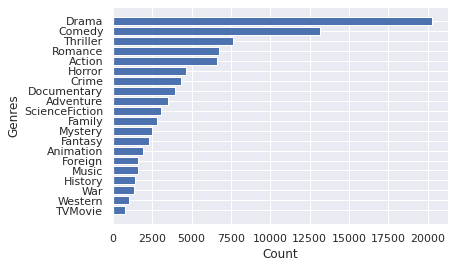

In [56]:
# sort the dictionary
genre_count = dict(sorted(genre_count.items(), key=lambda item: item[1]))

#plot
plt.barh(*zip(*genre_count.items()))
plt.xlabel("Count")
plt.ylabel("Genres")
plt.show()

### Insights from the bar chart which answers our first question

1. Most common genre in our dataset is "Drama", followed by Comedy and Thriller. 
2. TV Movies, Western and War movies hold up the smaller share of the dataset

In order to look up a decade wise breakup of the count, we will need to create a new column "decade" which will anchor off of the 
current "release_date" column

### Creating a decade column

In [57]:
df_movies['release_date'].value_counts()

2008-01-01    136
2009-01-01    121
2007-01-01    118
2005-01-01    111
2006-01-01    101
             ... 
1950-06-24      1
2008-08-03      1
1931-12-02      1
1949-04-08      1
2016-02-28      1
Name: release_date, Length: 17336, dtype: int64

In [58]:
# utilize lambda to create a new column "release decade" which will help us group the movies by decade
df_movies['release_decade'] = df_movies['release_date'].apply( lambda x : int((str(x))[:4][:3]+"0") if len(str(x)[:4])==4 else "")

df_movies['release_decade'].value_counts()

2010    12799
2000    11207
1990     5677
1980     3931
1970     3472
1960     2622
1950     2080
1940     1494
1930     1317
1920      432
1910      176
           90
1900       87
1890       75
1880        4
1870        2
2020        1
Name: release_decade, dtype: int64

There are some garbage values coming in like 'nanO' or 120,10 and 220 for a short number of records, which can be handled in our analysis.

## 2. Number of movies produced over decades and increase in revenue

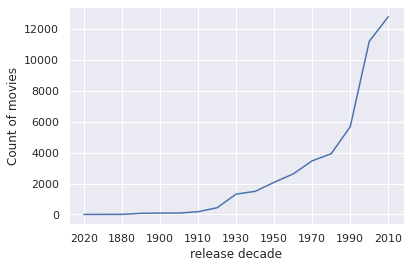

In [59]:
# plot the count to visualize the number of films produced over the decades

df_movies['release_decade'].value_counts().sort_values(ascending=True).plot(kind="line",xlabel='release decade', ylabel='Count of movies')

### Observations:

1. The number of movies produced see a bump during the 1930s post WW1 era, with a gradual increase till 1980.
2. Another interesting observation is a big jump witnessed in the 2000s , almost doubling up

Lets find the mean revenue value for each decade

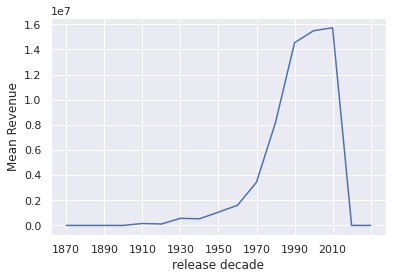

In [60]:
round(df_movies.groupby(['release_decade']).mean() ['revenue'],0).plot(kind="line",xlabel='release decade', ylabel='Mean Revenue')

## Observations

1. The sudden drop in 2020 can be ignored as we only have 1 movie for the decade of 2020 and the revenue is 0 (missing data)
2. The revenue saw a huge jump between 1970s, 1980s and 1990s, which comparatively slowed down between 1990 and 2010
3. The gradual increase of course is in line with higher number of movies being produced, higher dollar value and inflation and more audiences coming in to the theatres


Between the charts for revenue and count of movies, its interesting to know that the revenue saw a huge increase between 1970 and 1990 despite not being such a larger proportion of increase in the count of movies. This might be explained by a larger number of theatres opening up and more middle class income families choosing to spend on leisure items like theatres with families. 

In [61]:
round(df_movies.groupby(['release_decade']).mean() ['revenue'],0)

release_decade
1870           0.0
1880           0.0
1890           0.0
1900           0.0
1910      154190.0
1920      112830.0
1930      564319.0
1940      526083.0
1950     1054912.0
1960     1604719.0
1970     3438855.0
1980     8193877.0
1990    14534899.0
2000    15491789.0
2010    15726947.0
2020           0.0
               0.0
Name: revenue, dtype: float64

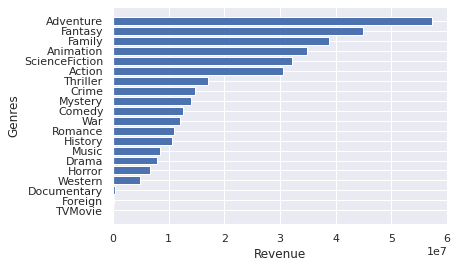

In [62]:

def plot_revenue(df):
    '''
    INPUT
    df - A dataframe
    
    OUTPUT
    plot the average revenue for genres
    '''
    # create a blank dictionary we will use to store the revenues by genre
    genre_revenue = dict()
    
    for item in genre_set:
        try:
            df_temp = df[ (df.genres.str.contains(item, regex=False)) ]
            genre_revenue[item] = np.mean(df_temp.revenue)
        except:
            continue
    # sort the dictionary
    genre_revenue = dict(sorted(genre_revenue.items(), key=lambda item: item[1]))
    #plot
    plt.xlabel("Revenue")
    plt.ylabel("Genres")
    plt.barh(*zip(*genre_revenue.items()))
    plt.show()

plot_revenue(df_movies)

## Observations:

1. Contrary to our initial expectation of Action and Thrillers bringing in higher revenue, 
   the **Adventure**, **Fantasy** and **Family** genres rake in the top 3 maximum mean revenue
   
2. Foreign language movies, Documentaries and  Western have the lowest mean revenue

## 3. Most popular genres (in terms of revenue) in the decades between 1920 and 2010

The above graph, while it does provide us with an average view of the revenue over the entire period of 1920s to 2000s, lets also find out how does this breakup look like for each decade.

We can look for interesting patterns in what has captured the attention of movie goers over decades

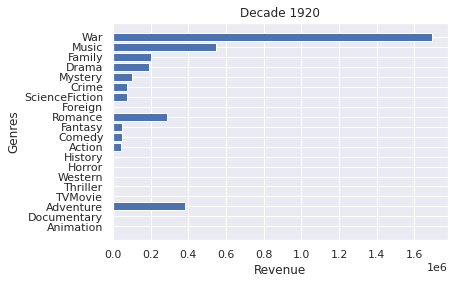

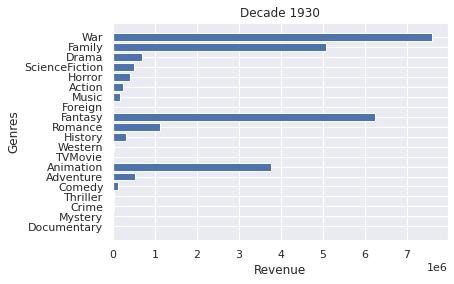

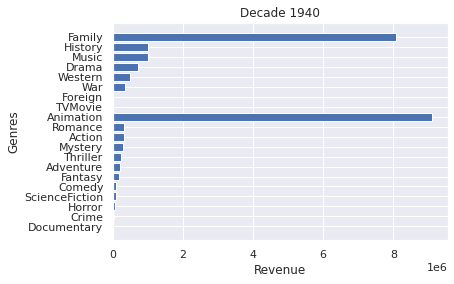

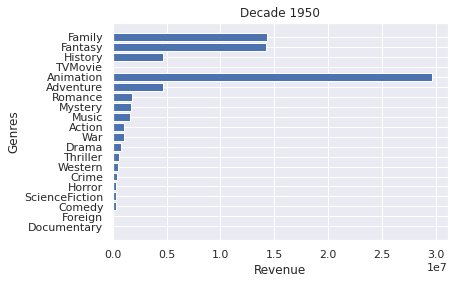

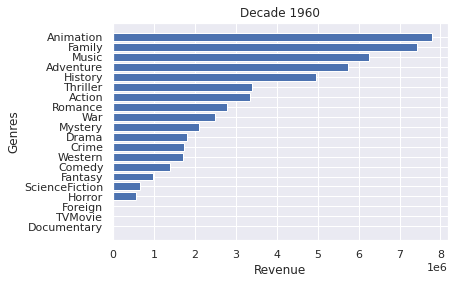

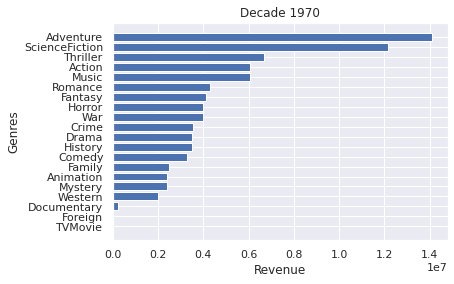

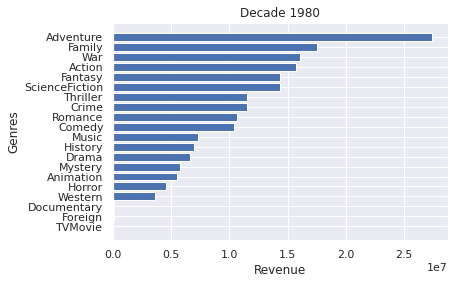

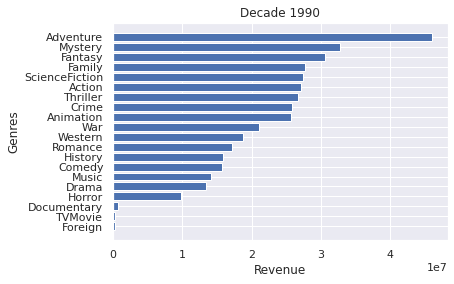

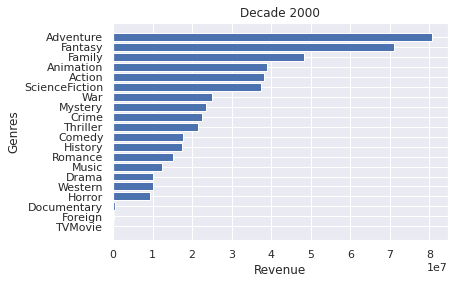

In [63]:

def plot_decade_revenue(df,decade):
    '''
    INPUT
    df - A dataframe
    
    OUTPUT
    plot the average revenue for genres in the user provided decade
    '''
    # create a blank dictionary we will use to store the revenues by genre
    genre_revenue = dict()
    
    for item in genre_set:
        try:
            df_temp = df[ (df.genres.str.contains(item, regex=False)) & (df['release_decade']==decade) ]
            genre_revenue[item] = np.mean(df_temp.revenue)
        except:
            continue
    # sort the dictionary
    genre_revenue = dict(sorted(genre_revenue.items(), key=lambda item: item[1]))
    #plot
    plt.title("Decade "+str(decade))
    plt.xlabel("Revenue")
    plt.ylabel("Genres")
    plt.barh(*zip(*genre_revenue.items()))
    plt.show()


for i in range(1920,2010,10):
    plot_decade_revenue(df_movies,i)

## Observation

1. There is a very interesting pattern in how the highest revenue genre has changed over the last 100 years

   1920s and 1930s - War
       - Understandably, due to the onset of World War I and II, a lot of movies with War as a theme
   1940s to 1960s - Animation and Family
       - The advances in Animation boosted the animation genre with Disney coming in and topping the revenue charts
   1970s to 2000s - Adventure
       - Adventurous outings like Raiders of the Lost Ark, Indiana Jones
       
2. If you notice carefully, the Action genre kept climbing up the charts over decades. 
   
   From being at the bottom of the charts in 1920s gradually moving up to the 4th/5th spot in terms of revenue in 2000s

Some examples of movies of the highest revenue from the decades, below:

### 1920s and 1930s - War

In [64]:
# listing down a sample of War movies between 1920s and 1930s
list(df_movies[((df_movies.genres.str.contains("War", regex=False))) & ((df_movies['release_decade']==1920) | (df_movies['release_decade']==1930))].original_title[:10])

['Gone with the Wind',
 'A Farewell to Arms',
 'Wings',
 'All Quiet on the Western Front',
 'La Grande Illusion',
 'Александр Невский',
 'Gunga Din',
 'Drums Along the Mohawk',
 'The Littlest Rebel',
 'The Plainsman']

### 1940s to 1960s - Animation and Family

In [65]:
# listing down a sample of Animation or Family movies between 1940s and 1960s
list(df_movies[((df_movies.genres.str.contains("Animation", regex=False)) | (df_movies.genres.str.contains("Family", regex=False))) & 
                   ((df_movies['release_decade']==1940) | (df_movies['release_decade']==1950) | (df_movies['release_decade']==1960))].original_title[:10])

['Pinocchio',
 'Kim',
 'My Fair Lady',
 'Father of the Bride',
 'Around the World in Eighty Days',
 "It's a Wonderful Life",
 'Davy Crockett, King of the Wild Frontier',
 'The Love Bug',
 'The Parent Trap',
 'The Shaggy Dog']

### 1970s to 2000s - Adventure

In [66]:
# listing down a sample of Adventure movies between 1970s and 2000s
list(df_movies[((df_movies.genres.str.contains("Adventure", regex=False))) & 
                   ((df_movies['release_decade']==1970) | (df_movies['release_decade']==1980) | (df_movies['release_decade']==1990) | (df_movies['release_decade']==2000))].original_title[:10])

['Jumanji',
 'Tom and Huck',
 'Sudden Death',
 'GoldenEye',
 'Balto',
 'Cutthroat Island',
 'Ace Ventura: When Nature Calls',
 'Assassins',
 'La Cité des Enfants Perdus',
 'Guillaumet, les ailes du courage']

## 4. Building a recommendation engine for users recommending movies based on genre, director and the lead

## We will consider the following parameters for a movie in our dataset to build a recommendation engine based on

1. genre
2. director
3. movie lead

### The user will be able to provide a movie name and receive the top 5 highest voted movies

In [67]:
# We are going to utilize the title field to first search for the user entered movie
# Checking null values in the title column
sum(df_movies.title.isna())

6

In [68]:
# exclude any null titles, id , genres, spoken languages or release decade from the dataframe
df_movies = df_movies[ (df_movies.title.isna()==False) & 
                              (df_movies.id.isna()==False) & (df_movies.genres.isna()==False) & (df_movies.release_decade.isna()==False) &
                             (df_movies.spoken_languages.isna()==False)]

In [69]:
# lets sample some rows from the Action genre, with a release decade of 2000 and language as English
# the vote_average is considered and sorted descending
df_movies[(df_movies.genres.str.contains("Action", regex=False)) & (df_movies.spoken_languages.str.contains("English", regex=False)) &
          (df_movies['release_decade']==2000) ][['id','imdb_id','title','spoken_languages','genres','vote_average']].sort_values(by="vote_average", ascending=False)[:5]

,id,imdb_id,title,spoken_languages,genres,vote_average
9389,27079,tt0338467,High Roller: The Stu Ungar Story,"[{'iso_639_1': 'en', 'name': 'English'}]","[Drama, Action]",10.0
30288,146679,tt0241218,Backyard Dogs,"[{'iso_639_1': 'en', 'name': 'English'}]","[Action, Comedy]",10.0
29322,53670,tt0288808,Say Nothing,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...","[Action, Drama, Mystery, Romance, ScienceFicti...",9.0
12481,155,tt0468569,The Dark Knight,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...","[Drama, Action, Crime, Thriller]",8.3
43190,331214,tt0185906,Band of Brothers,"[{'iso_639_1': 'de', 'name': 'Deutsch'}, {'iso...","[Action, Drama, War]",8.2


In [70]:
def find_movie_in_dataset(df,movie_name):
    '''
    INPUT:
    movie_name - (string) the movie name in raw text that a user can enter
    df - dataframe where the movie needs to be searched
    
    OUTPUT:
    movie_factors - a dictionary which has the movie id,title,genres,release decade and language value
    
    Description:
    Searches the movie id in the dataframe, stores the list id,title,genres,release decade and language value in a dictionary
    '''
    movie_factors=dict()
    movie_factors['id'] = df[(df.title.str.contains(movie_name, regex=True, case=False))][:1]['id'].values[0]
    movie_factors['title'] = df[(df.title.str.contains(movie_name, regex=True, case=False))][:1]['title'].values[0]
    movie_factors['genres'] = df[(df.title.str.contains(movie_name, regex=True, case=False))][:1]['genres'].values[0]
    movie_factors['director'] = df[(df.title.str.contains(movie_name, regex=True, case=False))][:1]['director'].values[0]
    movie_factors['lead'] = df[(df.title.str.contains(movie_name, regex=True, case=False))][:1]['lead'].values[0]
    movie_factors['release_decade'] = df[(df.title.str.contains(movie_name, regex=True, case=False))][:1]['release_decade'].values[0]
    movie_factors['spoken_languages'] = df[(df.title.str.contains(movie_name, regex=True, case=False))][:1]['spoken_languages'].values[0]
    return movie_factors

In [71]:
# read the csv file into a dataframe
# credits file is needed in order to join for cast and director information
df_credits = pd.read_csv("/kaggle/input/the-movies-dataset/credits.csv")

# display the first 3 rows
df_credits.head(3)

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602


In [72]:
# read the csv file into a dataframe
df_ratings = pd.read_csv("/kaggle/input/the-movies-dataset/ratings.csv")

# display the first 3 rows
df_ratings.head(3)

,userId,movieId,rating,timestamp
0,1,110,1.0,1425941529
1,1,147,4.5,1425942435
2,1,858,5.0,1425941523


In [73]:
df_movies[df_movies.id=='155']

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,release_decade
12481,False,"{'id': 263, 'name': 'The Dark Knight Collectio...",185000000,"[Drama, Action, Crime, Thriller]",http://thedarkknight.warnerbros.com/dvdsite/,155,tt0468569,en,The Dark Knight,Batman raises the stakes in his war on crime. ...,...,1.004558e+09,152.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Why So Serious?,The Dark Knight,False,8.3,12269.0,2000


In [74]:
# sampling a row value for the movie id 155 that is The Dark Knight
# df_credits[df_credits.id==155].cast.values

In [75]:
print(retrieve_tag_dataframe(df_credits,"cast","\'name\'",7,",",12481))

['ChristianBale']


In [76]:
# For utilizing the director and cast information, we will merge the movies dataframe with
# the credits.csv file

# we first make sure the id column is of the same "str" type to ensure merge works correctly
df_credits = df_credits.astype({"id":str})

# perform merge
df_movie_credits = pd.merge(df_movies,df_credits,on=['id'])
df_movie_credits.head(5)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,spoken_languages,status,tagline,title,video,vote_average,vote_count,release_decade,cast,crew
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[Animation, Comedy, Family]",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,1990,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de..."
1,False,NaN,65000000,"[Adventure, Fantasy, Family]",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,1990,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de..."
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[Romance, Comedy]",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,1990,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de..."
3,False,NaN,16000000,"[Comedy, Drama, Romance]",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0,1990,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de..."
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,[Comedy],NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0,1990,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de..."


In [77]:
df_movie_credits['genre_str'] = df_movie_credits['genres'].apply( lambda x : ' '.join(map(str, x)))

# Create the director column using custom method "retrieve_tag_field"
df_movie_credits['director'] = df_movie_credits['crew'].apply( lambda x : str(retrieve_tag_field(x,"\'job\': \'Director\'",27,",",1)))

# Create a lead actor/actress column using custom method "retrieve_tag_field"
df_movie_credits['lead'] = df_movie_credits['cast'].apply( lambda x : str(retrieve_tag_field(x,"\'name\'",7,",",1)))

# Clean the spoken languages column to only extract the "name" tag
df_movie_credits['spoken_languages'] = df_movie_credits['spoken_languages'].apply(lambda x: str(retrieve_tag_field(x,"'name':",7,"}",1)))

df_movie_credits.head(5)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,title,video,vote_average,vote_count,release_decade,cast,crew,genre_str,director,lead
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[Animation, Comedy, Family]",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,Toy Story,False,7.7,5415.0,1990,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",Animation Comedy Family,['JohnLasseter'],['TomHanks']
1,False,NaN,65000000,"[Adventure, Fantasy, Family]",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,Jumanji,False,6.9,2413.0,1990,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",Adventure Fantasy Family,['JoeJohnston'],['RobinWilliams']
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[Romance, Comedy]",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,Grumpier Old Men,False,6.5,92.0,1990,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",Romance Comedy,['HowardDeutch'],['WalterMatthau']
3,False,NaN,16000000,"[Comedy, Drama, Romance]",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,Waiting to Exhale,False,6.1,34.0,1990,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",Comedy Drama Romance,['ForestWhitaker'],['WhitneyHouston']
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,[Comedy],NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,Father of the Bride Part II,False,5.7,173.0,1990,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",Comedy,['CharlesShyer'],['SteveMartin']


In [78]:
def recommend_movies(movie_name, df):
    '''
    INPUT:
    movie_name - (string) the movie name in raw text that a user can enter
    df - dataframe where the movie needs to be searched
    
    OUTPUT:
    printing top 5 movies based on user selected movie, based on factors like genre and year
    
    Description:
    Searches the movie name in the dataframe, picks the list of genre listed for the movie and 
    filters on the same set of genres in the dataframe, sort and pick the top 5 based on vote_average
    
    '''
    try:
        # the find_movie_in_dataset method finds the movie name and returns a dictionary
        movie_factors = find_movie_in_dataset(df,movie_name)
        
        # extract the components of the dictionary into variables
        genre_list = movie_factors['genres']
        release_decade = movie_factors['release_decade']
        language = movie_factors['spoken_languages']
        director = movie_factors['director']
        lead = movie_factors['lead']
        
        # the row is dropped so that the same movie does not appear in the recommendation
        df = df[(df_movie_credits['id']) != (movie_factors['id'])]
        
        # we use the language and the genre_list to filter our list of top 5 movies
        most_similar_genres = list(df[(df.spoken_languages.str.contains(language, regex=False)) & 
                                     (' '.join(map(str, genre_list)) == df['genre_str'])].sort_values(by="vote_average", ascending=False)[:5]['title'])
        # we use the language and the director to filter our list of top 5 movies
        most_similar_director = list(df[(df.spoken_languages.str.contains(language, regex=False)) & 
                                        (df.director.str.contains(director, regex=False))].sort_values(by="vote_average", ascending=False)[:5]['title'])
        # we use the language and the lead to filter our list of top 5 movies
        most_similar_lead = list(df[(df.spoken_languages.str.contains(language, regex=False)) & 
                                    (df.lead.str.contains(lead, regex=False))].sort_values(by="vote_average", ascending=False)[:5]['title'])
        
        
    except:
        # if no movie found as per search term, show an error to the user
        print("Ooops !! Movie not found in our database... \nPlease try repeating your search using other keywords")
        return
    
    # Display to console the recommended movies
    print("***  Movie recommendations *** \n\n"+ "You selected : "+str(movie_factors['title']))
    
    # Based on Genres
    print("\n Top recommendations based on genre "+ str(genre_list)+"\n")
    if (len(most_similar_genres))>1:
        i=1
        for item in most_similar_genres:
            print(str(i)+". "+item)
            i+=1
    else:
        print(" Sorry no movies found matching the genre "+ str(genre_list))

    ## Based on Director
    print("\n Top recommendations based on director "+director+"\n")
    if (len(most_similar_director))>1:  
        i=1
        for item in most_similar_director:
            print(str(i)+". "+item)
            i+=1
    else:
        print(" Sorry no movies found matching the director "+director+"\n")
        
    ## Based on Lead
    print("\n Top recommendations based on lead "+lead+"\n")
    if (len(most_similar_lead))>1:
        i=1
        for item in most_similar_lead:
            print(str(i)+". "+item)
            i+=1
    else:
        print(" Sorry no movies found matching the lead "+lead+"\n")

In [81]:
# final call for user input
recommend_movies("Shawshank", df_movie_credits)

***  Movie recommendations *** 

You selected : The Shawshank Redemption

 Top recommendations based on genre ['Drama', 'Crime']

1. The Godfather
2. You and Me
3. The Godfather: Part II
4. Once Upon a Time in America
5. Casino

 Top recommendations based on director ['FrankDarabont']

1. The Mist
2. The Majestic
3. Buried Alive

 Top recommendations based on lead ['TimRobbins']

1. Jacob's Ladder
2. The Hudsucker Proxy
3. The Player
4. Bob Roberts
5. Nothing to Lose


In [80]:
# To check the details of the recommendations
# df_movie_credits[df_movie_credits.title.str.contains("ocean's eleven", case=False, regex=True)][['id','title','director','genres','release_decade','vote_average']]

,id,title,director,genres,release_decade,vote_average
4841,299,Ocean's Eleven,['LewisMilestone'],"[Thriller, Music, Comedy, Crime]",1960,6.6
4850,161,Ocean's Eleven,['StevenSoderbergh'],"[Thriller, Crime]",2000,7.2
